Лабораторная работа №3
"Частотный анализ"
Выполнил: Мартынов В.А., ДПИ-15

1. Загрузка данных

In [2]:
# 1.1(1.2) Импортируем библиотеки, загружаем данные и раскрываем их в фреймверке.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

all_data = pd.read_csv('dataset_group.csv' ,header=None)
all_data

,0,1,2
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


In [3]:
# 1.3 Получаем список всех id покупателей, которые есть в файле.

unique_id = list(set(all_data[1]))
print('Количество уникальных покупателей -',len(unique_id))

Количество уникальных покупателей - 1139


In [4]:
# 1.4 Получим список всех товаров, которые есть в файле.

items = list(set(all_data[2]))
print('Количество видов продукции -',len(items))

Количество видов продукции - 38


In [19]:
# 1.5 Сформируем датасет, который отражает информацию о корзине каждого покупателя.
#       При выводе видим, что образовался массив из 1139 элементов, в каждом из которых находится список покупок каждого покупателя.

dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in items] for id in unique_id]
print('Количество элементов в массиве -' ,len(dataset))
dataset

Количество элементов в массиве - 1139


[['yogurt',
  'pork',
  'sandwich bags',
  'lunch meat',
  'all- purpose',
  'flour',
  'soda',
  'butter',
  'vegetables',
  'beef',
  'aluminum foil',
  'all- purpose',
  'dinner rolls',
  'shampoo',
  'all- purpose',
  'mixes',
  'soap',
  'laundry detergent',
  'ice cream',
  'dinner rolls'],
 ['toilet paper',
  'shampoo',
  'hand soap',
  'waffles',
  'vegetables',
  'cheeses',
  'mixes',
  'milk',
  'sandwich bags',
  'laundry detergent',
  'dishwashing liquid/detergent',
  'waffles',
  'individual meals',
  'hand soap',
  'vegetables',
  'individual meals',
  'yogurt',
  'cereals',
  'shampoo',
  'vegetables',
  'aluminum foil',
  'tortillas',
  'mixes'],
 ['soda',
  'pork',
  'soap',
  'ice cream',
  'toilet paper',
  'dinner rolls',
  'hand soap',
  'spaghetti sauce',
  'milk',
  'ketchup',
  'sandwich loaves',
  'poultry',
  'toilet paper',
  'ice cream',
  'ketchup',
  'vegetables',
  'laundry detergent',
  'spaghetti sauce',
  'bagels',
  'soap',
  'ice cream',
  'shampoo',

2. Подготовка данных

In [6]:
# 2.1 (2.2) Для корректного анализа данных, формируем таблицу.
#           Таблица представляет собой набор булевых значений напротив вида продукции по вертикали и напротив идентификатора покупателя по горизонтали.
#           Значение в таблице говорит о наличии конкретного вида продукции в корзине покупателя.

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


3. Ассоциативный анализ с использованием алгоритма Apriori

In [7]:
# 3.1 В качестве результата применения алгоритма Apriori выступает таблица, в которой отражен процент выбора определенного вида продукции или их комбинаций.
#     Параметр 'length' показывает количество видов продукции для которых производится расчёт в строке.

from mlxtend.frequent_patterns import apriori

results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


In [8]:
# 3.2 Применим алгоритм снова, но выведем информацию только для уникальных видов продукций, без комбинаций

results_all_3 = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results_all_3

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


In [9]:
# 3.3 Аналогично применим алгоритм, но для комбинаций из двух видов продукции.

results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]

results

,support,itemsets,length
38,0.310799,"(aluminum foil, vegetables)",2
39,0.300263,"(vegetables, bagels)",2
40,0.310799,"(vegetables, cereals)",2
41,0.309043,"(vegetables, cheeses)",2
42,0.308165,"(vegetables, dinner rolls)",2
43,0.306409,"(vegetables, dishwashing liquid/detergent)",2
44,0.326602,"(vegetables, eggs)",2
45,0.302897,"(vegetables, ice cream)",2
46,0.309043,"(vegetables, laundry detergent)",2
47,0.311677,"(vegetables, lunch meat)",2


In [10]:
print('\nCount of result itemstes = ', len(results))


Count of result itemstes =  14


<function matplotlib.pyplot.show(close=None, block=None)>

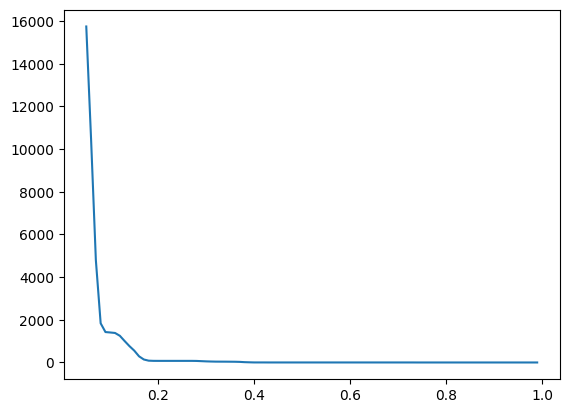

In [11]:
# 3.4 Построим график, отражающий зависимость количества наборов при разных уровнях поддержки.

min_support_range = np.arange(0.05, 1, 0.01)

itemsets_length = []
for min_support in min_support_range:
    results = apriori(df, min_support=min_support, use_colnames=True)
    itemsets_length.append(len(results))

plt.figure

plt.plot(min_support_range.tolist(), itemsets_length)

plt.show

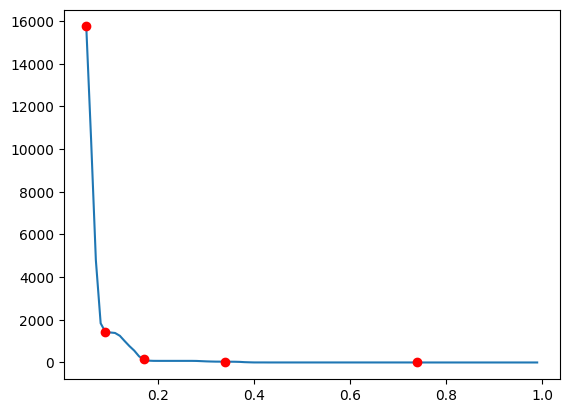

In [12]:
# 3.5 Для наглядности, необходимо добавить точки, отражающие информацию о диапазонах генерации наборов с размерностью 1,2,3 и т.д

from math import isnan

itemsets_length = []
threshold_supports = []
threshold_length = []

last_itemset_len = len(df.columns)

for min_support in min_support_range:
    results = apriori(df, min_support=min_support, use_colnames=True)
    itemsets_length.append(len(results))

    results['length'] = results['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = results['length'].max()

    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0

    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
        threshold_supports.append(min_support)
        threshold_length.append(len(results))

plt.figure()

plt.plot(min_support_range.tolist(), itemsets_length)
plt.plot(threshold_supports, threshold_length, 'ro')

plt.show()

In [13]:
# 3.6 Построили датасет из элементов наборов размера 1 при уровне поддержки 0.38.

results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
items_1_38 = [ list(elem)[0] for elem in results['itemsets']]
dataset_1_38 = [[elem for elem in all_data[all_data[1] == id][2] if elem in
items_1_38] for id in unique_id]

dataset_1_38

[['yogurt',
  'lunch meat',
  'soda',
  'vegetables',
  'aluminum foil',
  'dinner rolls',
  'ice cream',
  'dinner rolls'],
 ['waffles',
  'vegetables',
  'cheeses',
  'milk',
  'dishwashing liquid/detergent',
  'waffles',
  'vegetables',
  'yogurt',
  'cereals',
  'vegetables',
  'aluminum foil'],
 ['soda',
  'ice cream',
  'dinner rolls',
  'milk',
  'poultry',
  'ice cream',
  'vegetables',
  'bagels',
  'ice cream',
  'lunch meat',
  'cereals',
  'vegetables',
  'cheeses',
  'eggs',
  'vegetables',
  'vegetables'],
 ['cereals', 'lunch meat', 'soda'],
 ['vegetables',
  'vegetables',
  'vegetables',
  'vegetables',
  'poultry',
  'eggs',
  'vegetables',
  'vegetables',
  'milk',
  'waffles',
  'vegetables',
  'dinner rolls',
  'soda',
  'yogurt'],
 ['eggs',
  'vegetables',
  'bagels',
  'dishwashing liquid/detergent',
  'cereals',
  'cereals',
  'bagels',
  'poultry',
  'bagels',
  'aluminum foil',
  'milk'],
 ['vegetables',
  'milk',
  'ice cream',
  'dishwashing liquid/detergent',

In [14]:
# 3.7 Приводим датасет к формату, который можно обработать

te = TransactionEncoder()
te_ary = te.fit(dataset_1_38).transform(dataset_1_38)
df_1_38 = pd.DataFrame(te_ary, columns=te.columns_)

df_1_38

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


In [24]:
# 3.8 Сходства двух приведённых массивов заключаются в совпадении видов продукции.
#     Различий гораздо больше. Значения уровня поддержки для одних и тех же позиций отличаются, так как общее количество транзаций изменилось для нового датасета.
#     Также видно, в выборке позиций участвуют элементы с длиной более 1, что также вносит различия между двумя датасетами.


results = apriori(df_1_38, min_support=0.3, use_colnames=True)

results.join(results_all_3, lsuffix='_all', rsuffix='_supp_0.3')

,support_all,itemsets_all,support_supp_0.3,itemsets_supp_0.3
0,0.384548,(aluminum foil),0.374890,(all- purpose)
1,0.385426,(bagels),0.384548,(aluminum foil)
2,0.395961,(cereals),0.385426,(bagels)
3,0.390694,(cheeses),0.374890,(beef)
4,0.388938,(dinner rolls),0.367867,(butter)
5,0.388060,(dishwashing liquid/detergent),0.395961,(cereals)
6,0.389816,(eggs),0.390694,(cheeses)
7,0.398595,(ice cream),0.379280,(coffee/tea)
8,0.395083,(lunch meat),0.388938,(dinner rolls)
9,0.380158,(milk),0.388060,(dishwashing liquid/detergent)


In [16]:
# 3.9 Ассоциативный анализ при уровне поддержки 0.15 для нового датасета.

results = apriori(df, min_support=0.15, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
551,0.158033,"(vegetables, lunch meat, poultry)"
552,0.157155,"(vegetables, waffles, lunch meat)"
553,0.156277,"(vegetables, mixes, poultry)"
554,0.151888,"(vegetables, sugar, poultry)"


In [17]:
# Все наборы размер которых больше 1 и в котором есть 'yogurt' или 'waffles'

results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] > 1]
results = results[results['itemsets'].apply(lambda x: ('yogurt' in x) or ('waffles' in x))]
results

,support,itemsets,length
60,0.167691,"(waffles, all- purpose)",2
61,0.167691,"(all- purpose, yogurt)",2
91,0.169447,"(aluminum foil, waffles)",2
92,0.177349,"(aluminum foil, yogurt)",2
122,0.159789,"(waffles, bagels)",2
...,...,...,...
539,0.173837,"(waffles, yogurt)",2
540,0.152766,"(aluminum foil, vegetables, yogurt)",3
550,0.157155,"(vegetables, eggs, yogurt)",3
552,0.157155,"(vegetables, waffles, lunch meat)",3


In [26]:
# 3.10 Приведенный к удобному для анализа виду датасет из оставшихся элементов

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
all_df = pd.DataFrame(te_ary, columns=te.columns_)

diff_df = all_df[all_df.columns.difference(items_1_38)]
diff_df

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


In [126]:
# 3.11 Анализируем полученный датасет с показателем поддержки 0.3...

results = apriori(diff_df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
5,0.370500,(fruits)
6,0.345917,(hand soap)
7,0.375768,(individual meals)
8,0.376646,(juice)
9,0.371378,(ketchup)


In [127]:
# ...и с показателем поддержки 0.15

results = apriori(diff_df, min_support=0.15, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
...,...,...
128,0.154522,"(soap, sugar)"
129,0.164179,"(soap, toilet paper)"
130,0.151888,"(spaghetti sauce, toilet paper)"
131,0.151888,"(sugar, toilet paper)"


In [27]:
# 3.12 Правило для вывода всех наборов, в которых хотя бы два элемента начинаются на 's'


te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
all_df = pd.DataFrame(te_ary, columns=te.columns_)

results = apriori(all_df, min_support=0.1, use_colnames=True)
results = results[results['itemsets'].apply(
    lambda x: np.fromiter(
        map(lambda y: y.startswith('s'), x), dtype=bool
        ).sum() >= 2
)]
results

,support,itemsets
675,0.137840,"(sandwich loaves, sandwich bags)"
676,0.146620,"(shampoo, sandwich bags)"
677,0.158911,"(soap, sandwich bags)"
678,0.162423,"(sandwich bags, soda)"
679,0.147498,"(spaghetti sauce, sandwich bags)"
680,0.131694,"(sugar, sandwich bags)"
686,0.150132,"(shampoo, sandwich loaves)"
687,0.158033,"(soap, sandwich loaves)"
688,0.141352,"(sandwich loaves, soda)"
689,0.150132,"(sandwich loaves, spaghetti sauce)"


In [28]:
# 3.13 Правило, для вывода всех наборов, для которых уровень поддержки лежит в диапазоне от 0.1 до 0.25

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
all_df = pd.DataFrame(te_ary, columns=te.columns_)

results = apriori(all_df, min_support=0.1, use_colnames=True)

results = results[np.logical_and(results.support <= 0.25, results.support >= 0.1)]
results

,support,itemsets
38,0.157155,"(aluminum foil, all- purpose)"
39,0.150132,"(all- purpose, bagels)"
40,0.144864,"(beef, all- purpose)"
41,0.147498,"(all- purpose, butter)"
42,0.151010,"(all- purpose, cereals)"
...,...,...
1401,0.135206,"(vegetables, toilet paper, waffles)"
1402,0.130817,"(vegetables, toilet paper, yogurt)"
1403,0.121159,"(tortillas, vegetables, waffles)"
1404,0.130817,"(tortillas, vegetables, yogurt)"
